In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [13]:
df = pd.read_csv('supplier_data.csv')

In [14]:
# Convert 'Avg. Cost($)' to numeric values
df['Avg. Cost($)'] = df['Avg. Cost($)'].str.replace('k', '').astype(float) * 1000


In [15]:
# Encode categorical variables
label_encoders = {}
for column in ['Supplier Name', 'Region', 'Country', 'Function', 'Service', 'Delivery Frequency', 'Geographical Coverage', 'Technology Used']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
# Convert other columns to numeric as needed
df['Number of Escalations'] = df['Number of Escalations'].astype(int)
df['Average Delivery Time (days)'] = df['Average Delivery Time (days)'].astype(float)


In [17]:
# Define features and target
X = df[['Supplier Name', 'Region', 'Country', 'Function', 'Service', 'Avg. Cost($)', 'Average Delivery Time (days)', 'Number of Escalations', 'Lead Time (days)', 'Total Shipments', 'On-Time Delivery Rate (%)', 'Customer Satisfaction Score', 'Return Rate (%)', 'Contract Duration (months)', 'Geographical Coverage', 'Technology Used']]
y = df['On-Time Delivery Rate (%)'] > 85  # Example target variable for classification: On-Time Delivery Rate > 85%

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions
y_pred = rf_model.predict(X_test)


In [20]:
# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       396
        True       1.00      1.00      1.00       204

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Accuracy Score: 1.0


In [21]:
# Display feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)



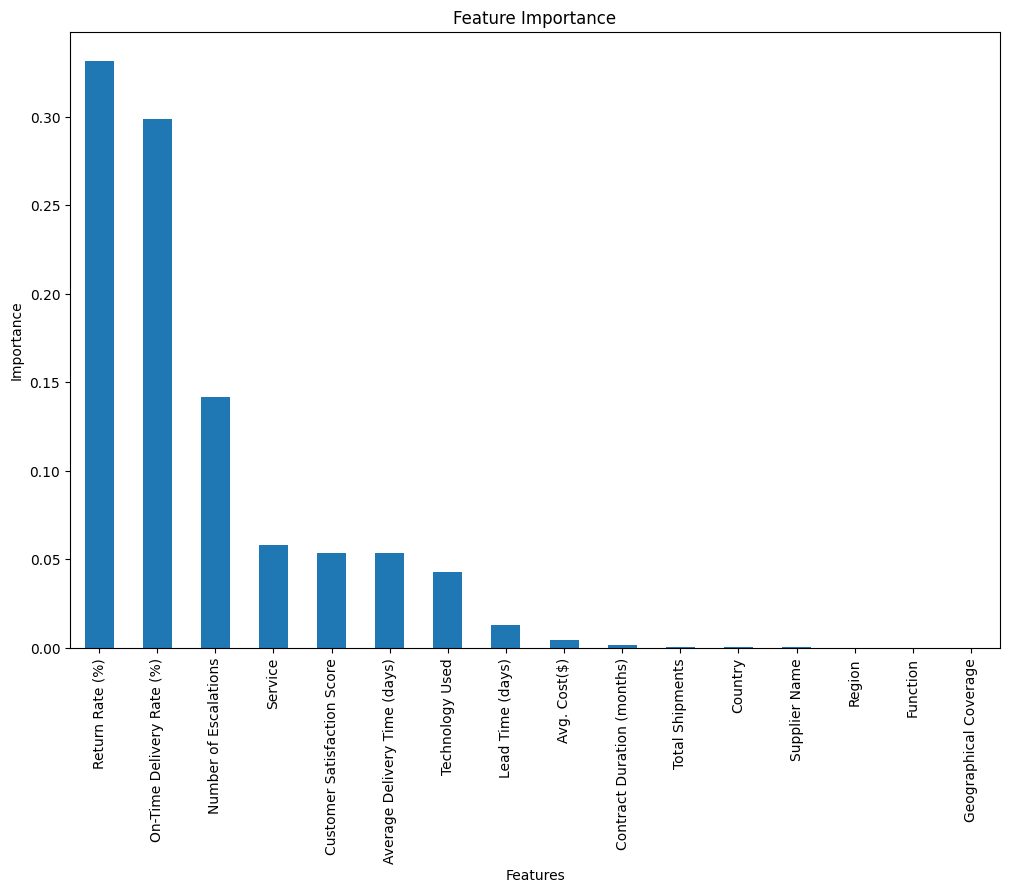

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()